## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv('test_nfaJ3J5.csv')
train = pd.read_csv('train_0irEZ2H.csv')

## Looking at data

In [3]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [4]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


## Finding out the distnict values

In [5]:
train.loc[:,train.select_dtypes(include=['object']).columns.tolist()].nunique()

week    130
dtype: int64

In [6]:
train.loc[:,train.select_dtypes(exclude=['object']).columns.tolist()].nunique()

record_ID          150150
store_id               76
sku_id                 28
total_price           646
base_price            572
is_featured_sku         2
is_display_sku          2
units_sold            708
dtype: int64

## Finding out number of missing values

In [8]:
train.loc[:,train.select_dtypes(include=['object']).columns.tolist()].isnull().sum()

week    0
dtype: int64

In [9]:
train.loc[:,train.select_dtypes(exclude=['object']).columns.tolist()].isnull().sum()

record_ID          0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

## Taking care of missing values

In [11]:
train.dropna(inplace=True)
train.isnull().sum()


record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

## Importing plotting libraries

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

## Taking care of datetime data types

In [13]:
train.shape

(150149, 9)

In [14]:
date = pd.DatetimeIndex(train['week'])
train['w_o_y'] = date.isocalendar().week.to_numpy()
train['d_o_w'] = date.isocalendar().day.to_numpy()
train['y'] = date.isocalendar().year.to_numpy()
train['m_o_y'] = date.month
train = train.drop('week',axis=1)

In [15]:
train

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,w_o_y,d_o_w,y,m_o_y
0,1,8091,216418,99.0375,111.8625,0,0,20,3,1,2011,1
1,2,8091,216419,99.0375,99.0375,0,0,28,3,1,2011,1
2,3,8091,216425,133.9500,133.9500,0,0,19,3,1,2011,1
3,4,8091,216233,133.9500,133.9500,0,0,44,3,1,2011,1
4,5,8091,217390,141.0750,141.0750,0,0,52,3,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,36,6,2013,9
150146,212639,9984,223153,235.8375,235.8375,0,0,30,36,6,2013,9
150147,212642,9984,245338,357.6750,483.7875,1,1,31,36,6,2013,9
150148,212643,9984,547934,141.7875,191.6625,0,1,12,36,6,2013,9


In [16]:
train['is_featured_sku'] = train['is_featured_sku'].astype('category')
train['is_display_sku'] = train['is_display_sku'].astype('category')
train['y'] = train['y'].astype('category')
train['sku_id'] = train['sku_id'].astype('category')
train['store_id'] = train['store_id'].astype('category')
train['m_o_y'] = train['m_o_y'].astype('category')
train['d_o_w'] = train['d_o_w'].astype('category')
train['w_o_y'] = train['w_o_y'].astype('category')

## Getting descriptive statistics summary

In [17]:
import sys
sys.path.append('/home/kshitij/Documents/Data Science Bootcamp/functions/')
import uni 

# Test the function
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
uni.unistats(train)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
units_sold,150149,0,708,int64,True,15,51.674543,1,20.0,35.0,62.0,2876,60.207962,6.115006,93.68638
total_price,150149,0,646,float64,True,205.9125,206.626751,41.325,130.3875,198.075,233.7,562.1625,103.308516,1.250565,1.238268
base_price,150149,0,572,float64,True,205.9125,219.424262,61.275,133.2375,205.9125,234.4125,562.1625,110.960204,1.209018,0.867974
record_ID,150149,0,150149,int64,True,1,106270.971795,1,53111.0,106226.0,159452.0,212644,61385.82558,0.001136,-1.20036
store_id,150149,0,76,category,False,8094,-,-,-,-,-,-,-,-,-
w_o_y,150149,0,51,category,False,5,-,-,-,-,-,-,-,-,-
sku_id,150149,0,28,category,False,219009,-,-,-,-,-,-,-,-,-
m_o_y,150149,0,12,category,False,5,-,-,-,-,-,-,-,-,-
d_o_w,150149,0,7,category,False,1,-,-,-,-,-,-,-,-,-
y,150149,0,3,category,False,2012,-,-,-,-,-,-,-,-,-


## Univariate Analysis: Numerical Variables

In [18]:
train.loc[:,train.select_dtypes(exclude=['object','category']).columns.tolist()].nunique()

record_ID      150149
total_price       646
base_price        572
units_sold        708
dtype: int64

In [19]:
# Drop the unwanted feature
train = train.drop('record_ID',axis=1)

In [20]:
train.loc[:,train.select_dtypes(exclude=['object','category']).columns.tolist()].nunique()

total_price    646
base_price     572
units_sold     708
dtype: int64

In [21]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(x = data[i], shade=True)
    sns.lineplot(x = points, y = [0, 0], color = 'green', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0, 0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
    sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                    round(kurt,2),
                                                                                                    round(skew,2),
                                                                                                    (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                    round(mean,2),
                                                                                                    round(median,2)))

In [22]:
train.loc[:,train.select_dtypes(exclude=['object','category']).columns.tolist()].columns

Index(['total_price', 'base_price', 'units_sold'], dtype='object')

In [23]:
group1 = [ 'total_price', 'base_price', 'units_sold']

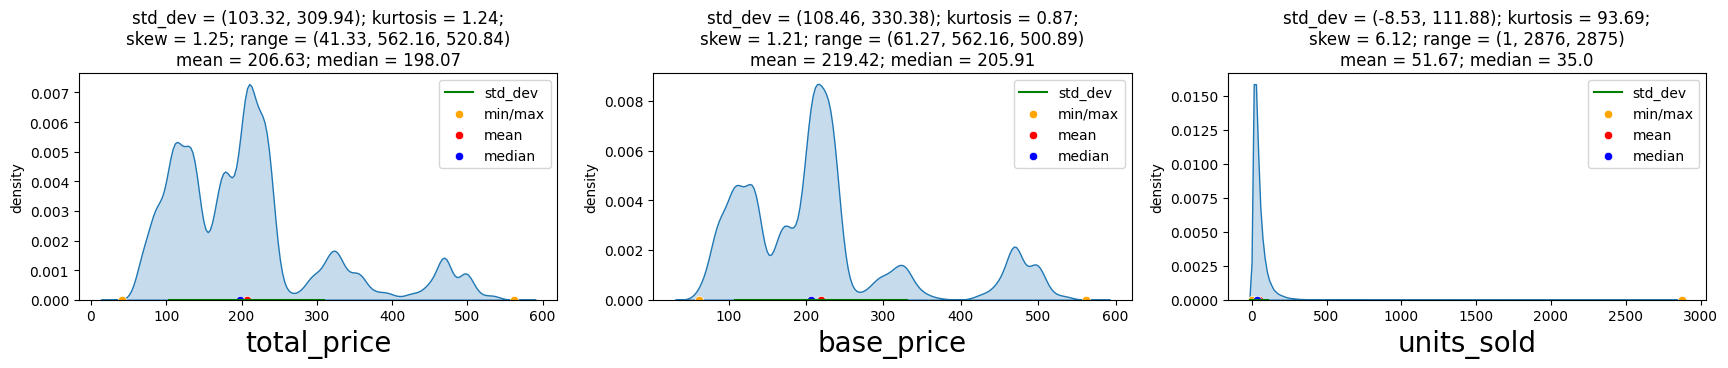

In [24]:
UVA_numeric(train, group1)

## Univariate Analysis : Categorical Varibales

In [25]:
train.loc[:,train.select_dtypes(include=['object','category']).columns.tolist()].nunique()

store_id           76
sku_id             28
is_featured_sku     2
is_display_sku      2
w_o_y              51
d_o_w               7
y                   3
m_o_y              12
dtype: int64

In [26]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y = norm_count,x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [27]:
train.loc[:,train.select_dtypes(include=['object','category']).columns.tolist()].columns

Index(['store_id', 'sku_id', 'is_featured_sku', 'is_display_sku', 'w_o_y',
       'd_o_w', 'y', 'm_o_y'],
      dtype='object')

In [28]:
group3 = ['store_id', 'is_featured_sku', 'is_display_sku','sku_id']
group4 = ['w_o_y', 'd_o_w', 'y','m_o_y']

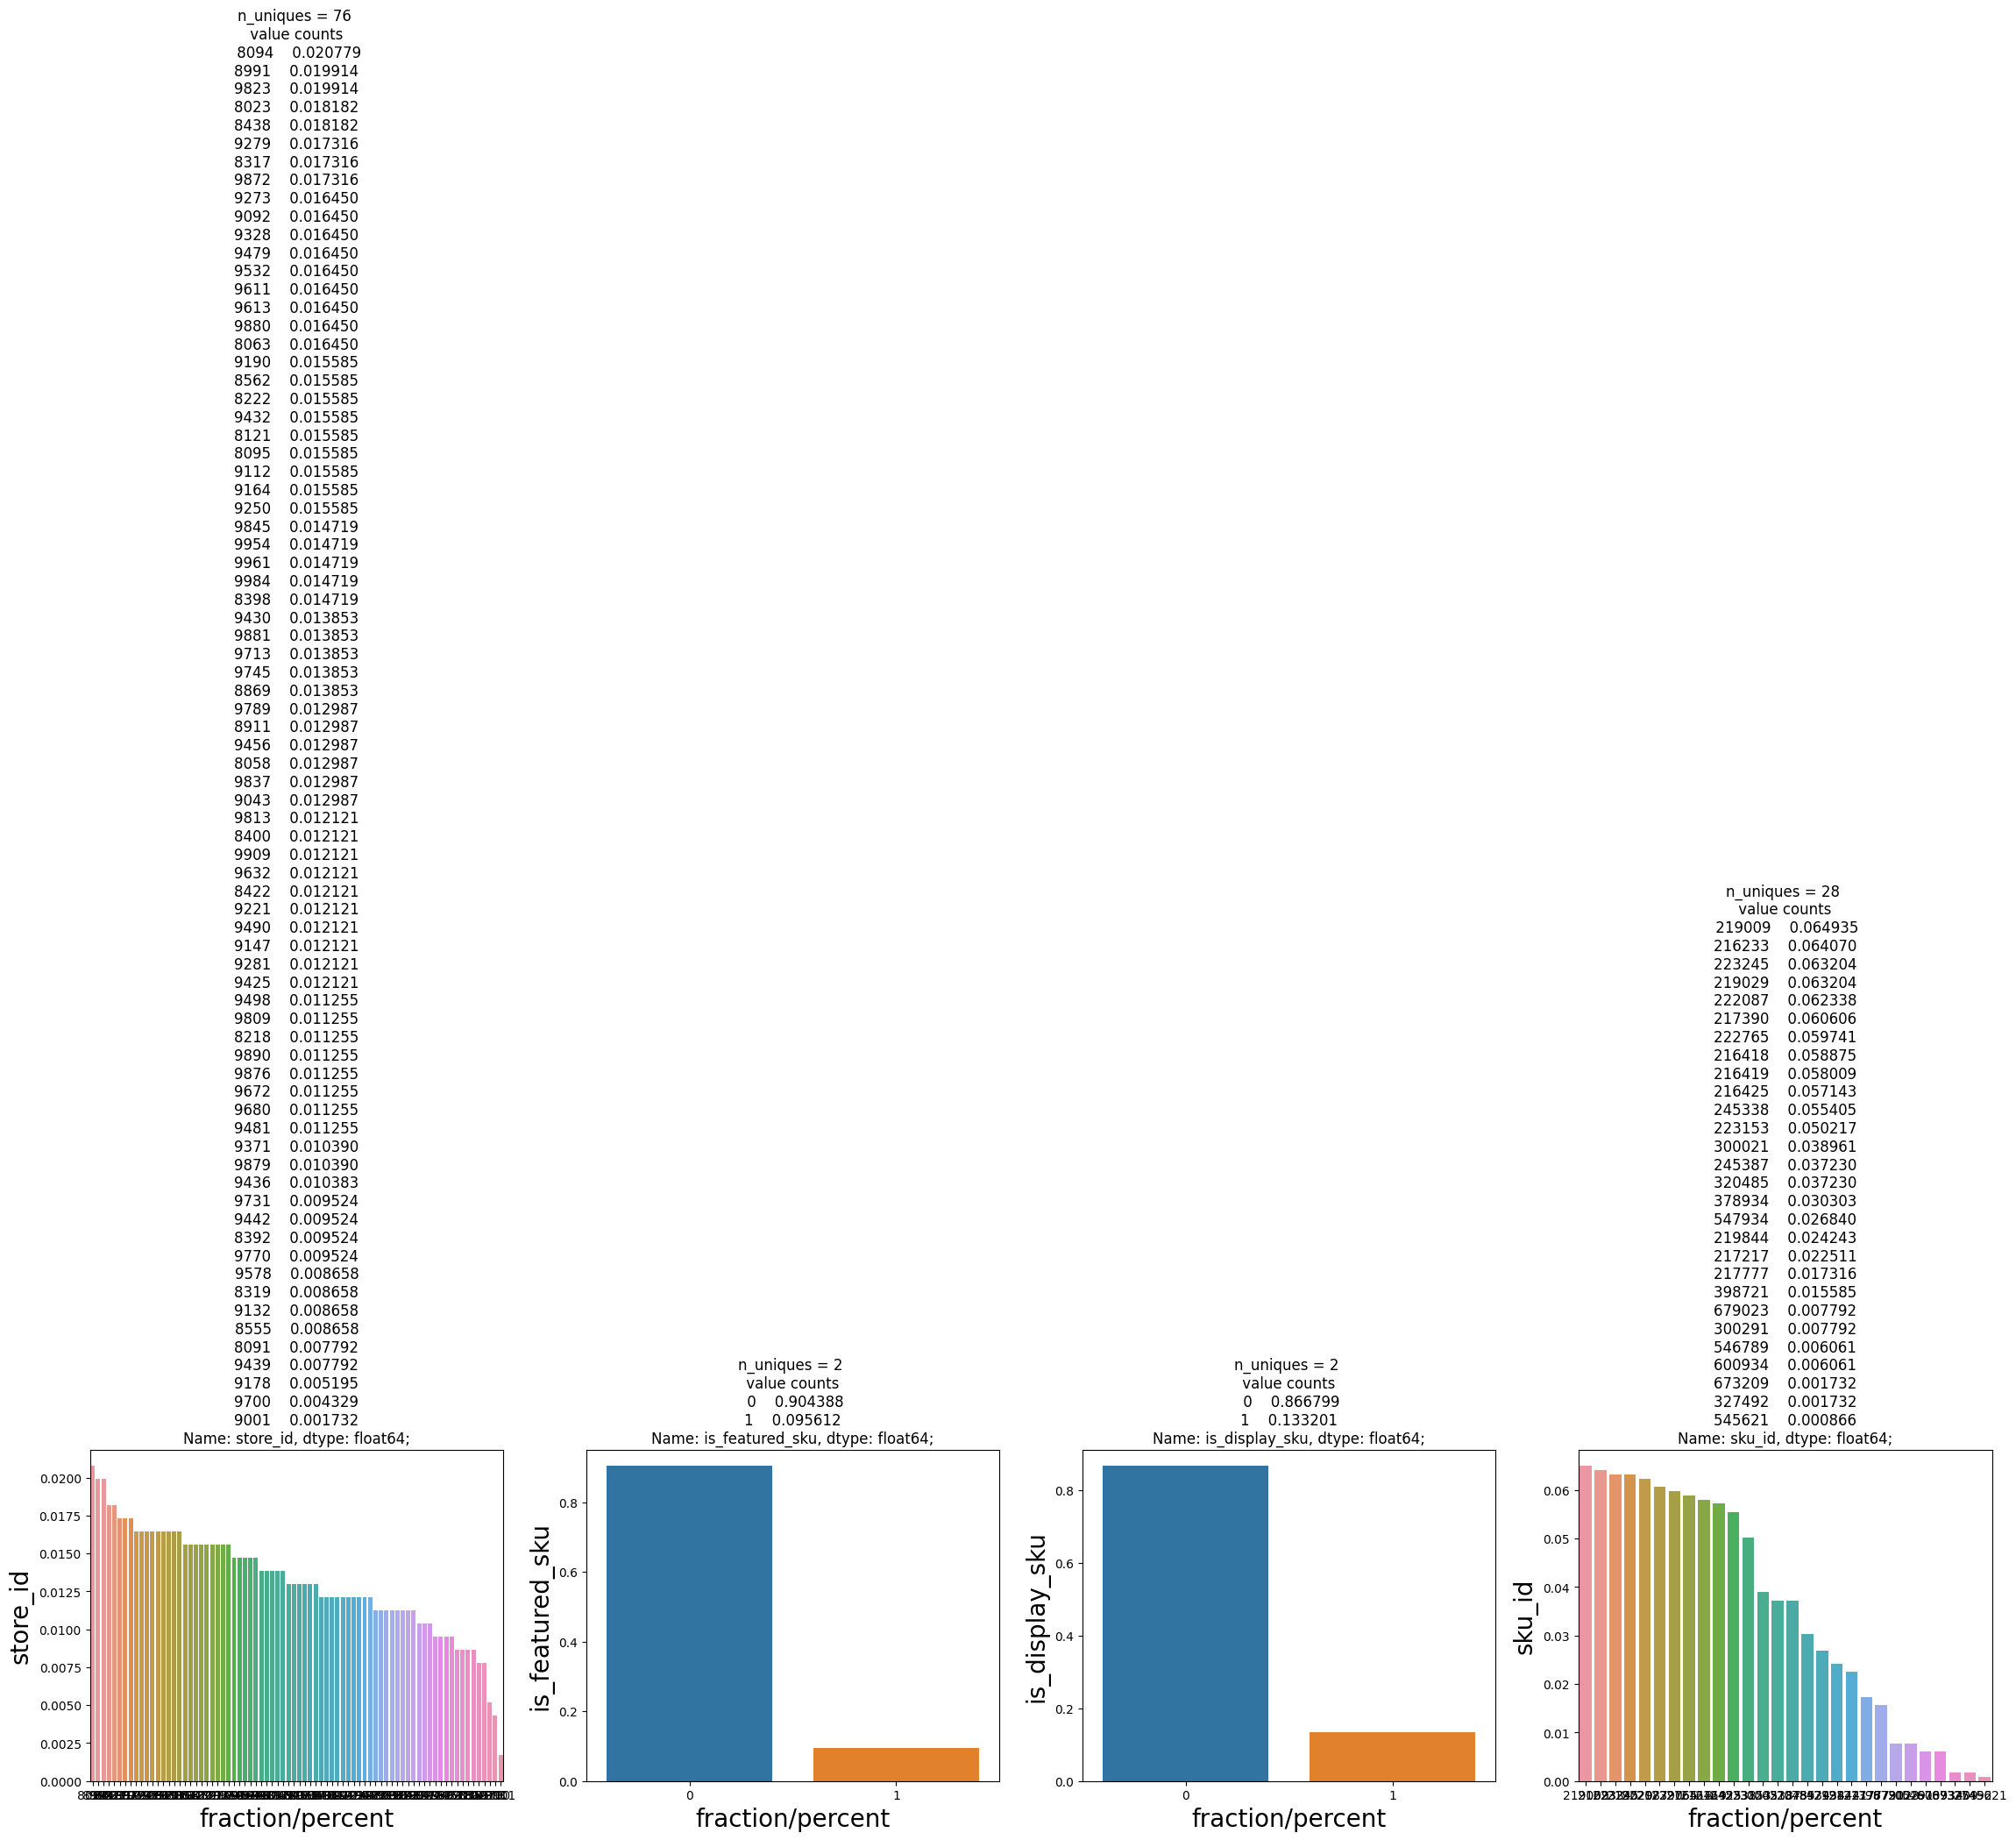

In [29]:
UVA_category(train,group3)

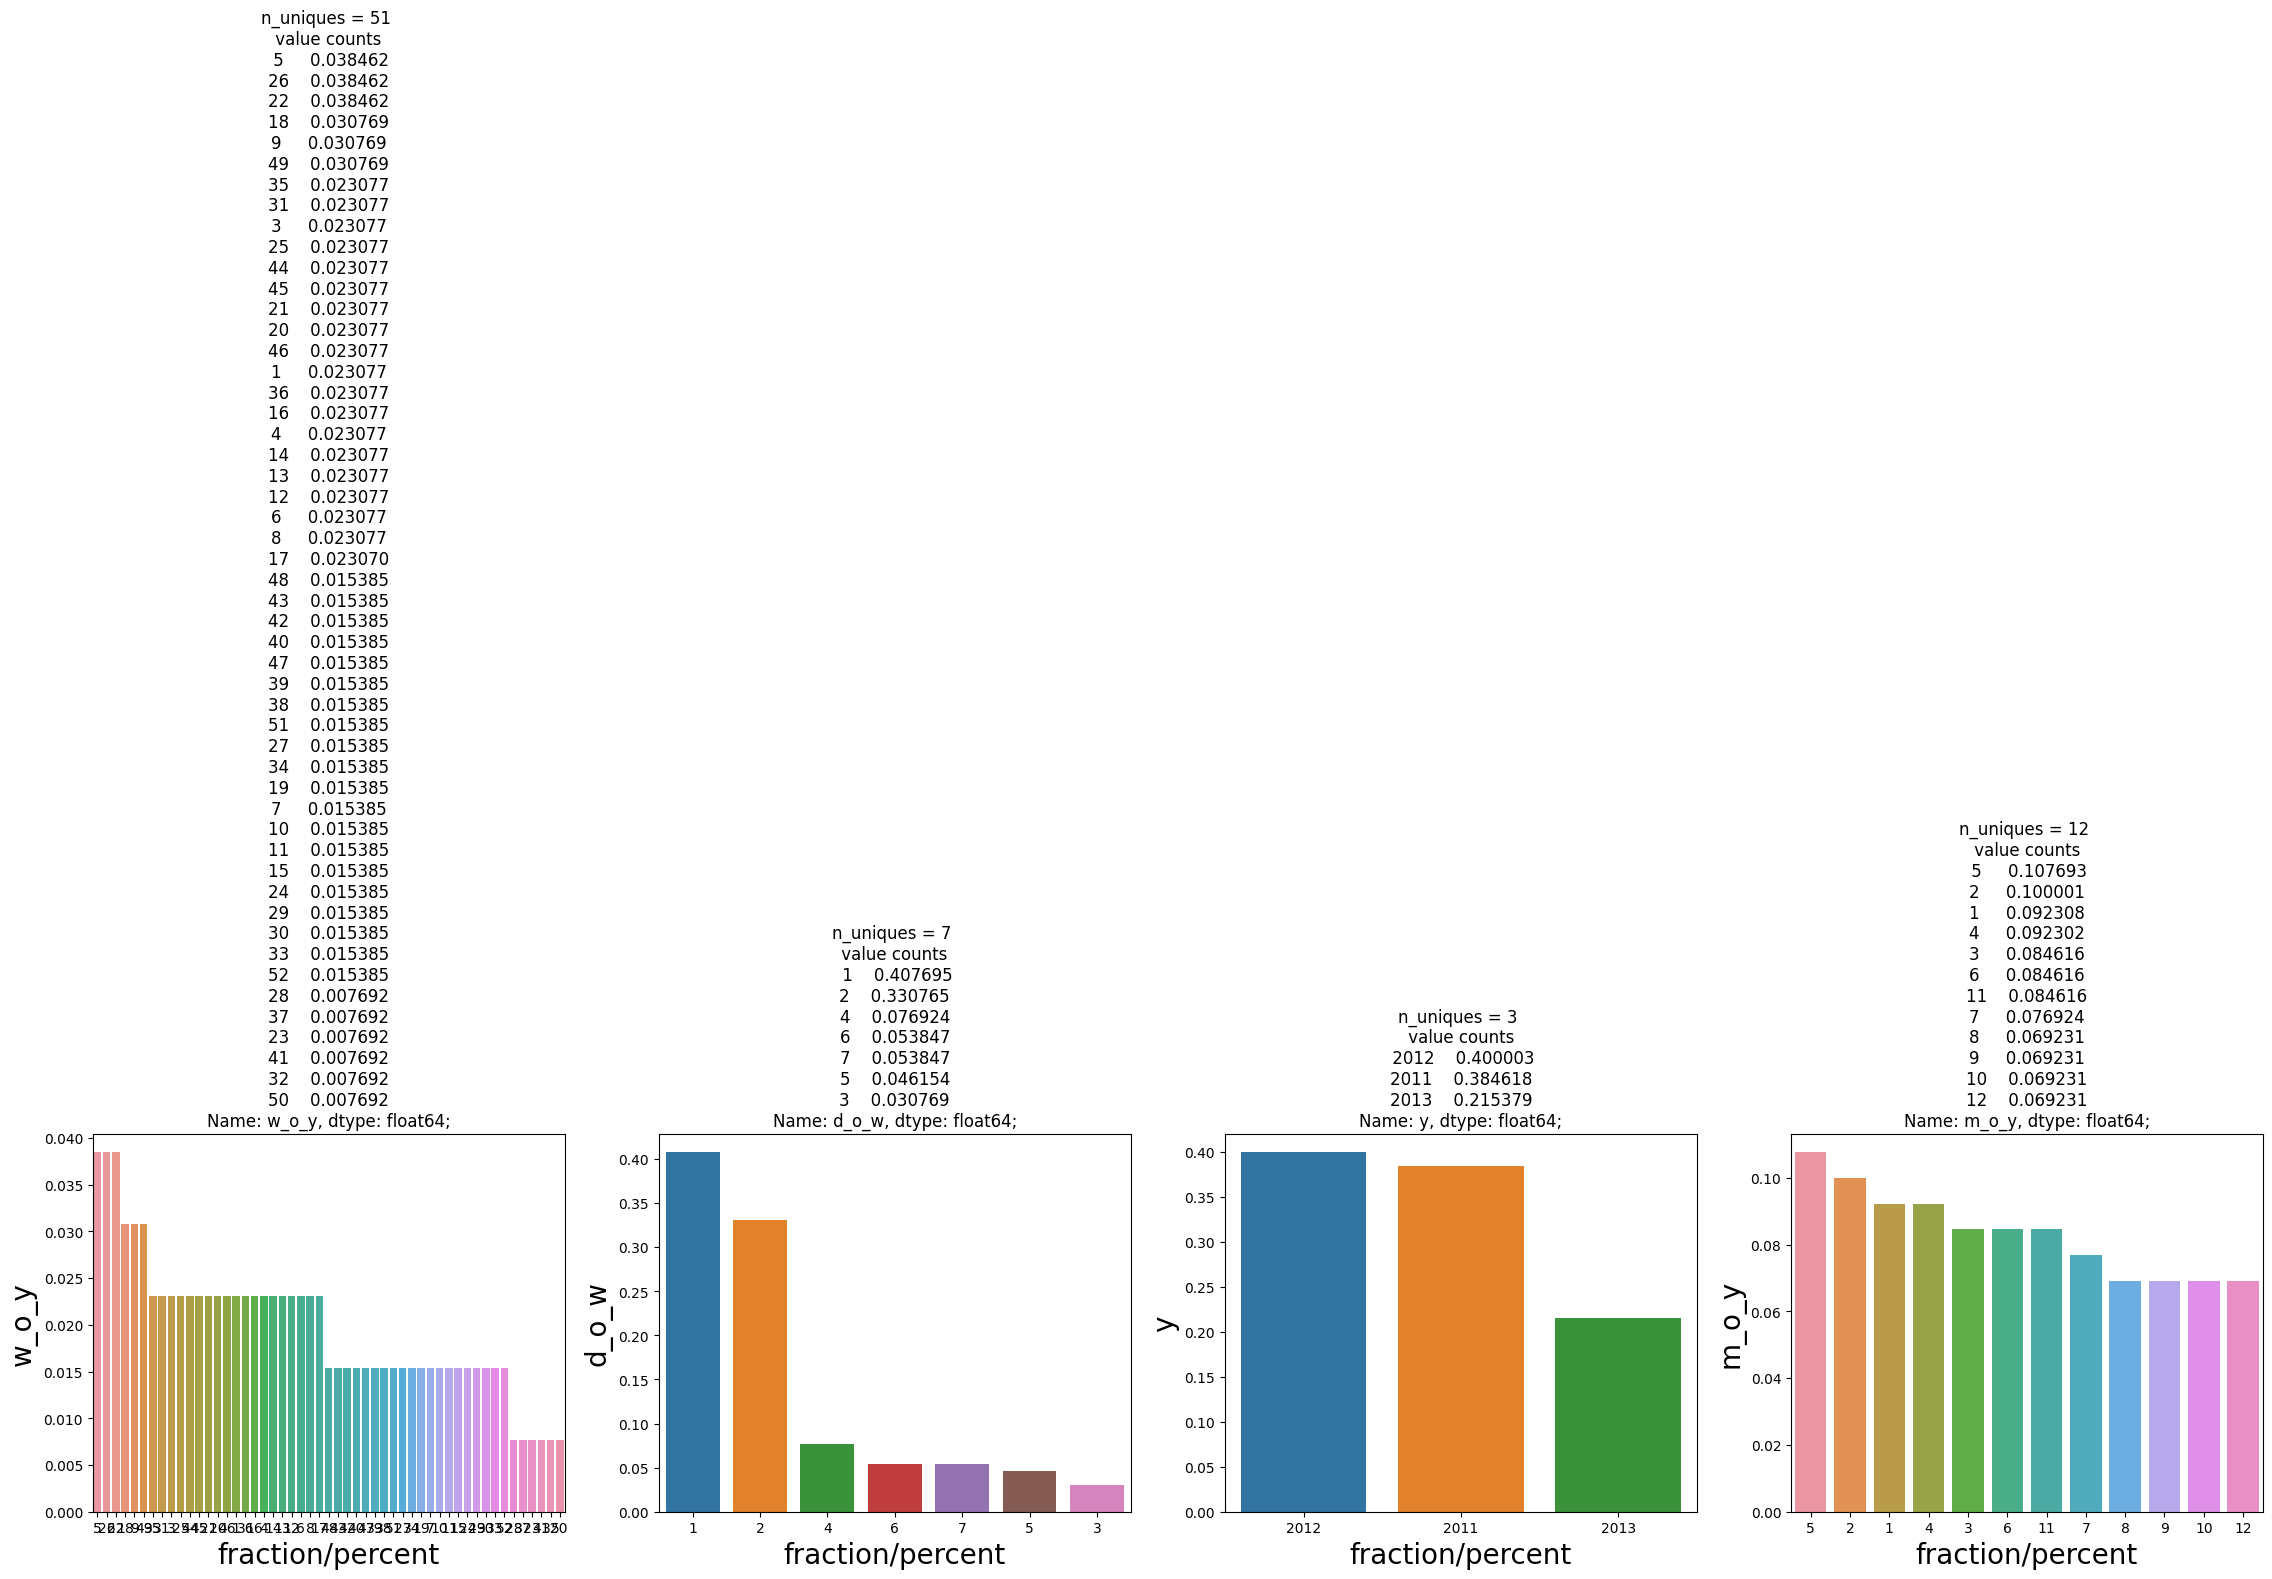

In [30]:
UVA_category(train,group4)

## Univariate Analysis: Outliers

In [31]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(x = data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(x = data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

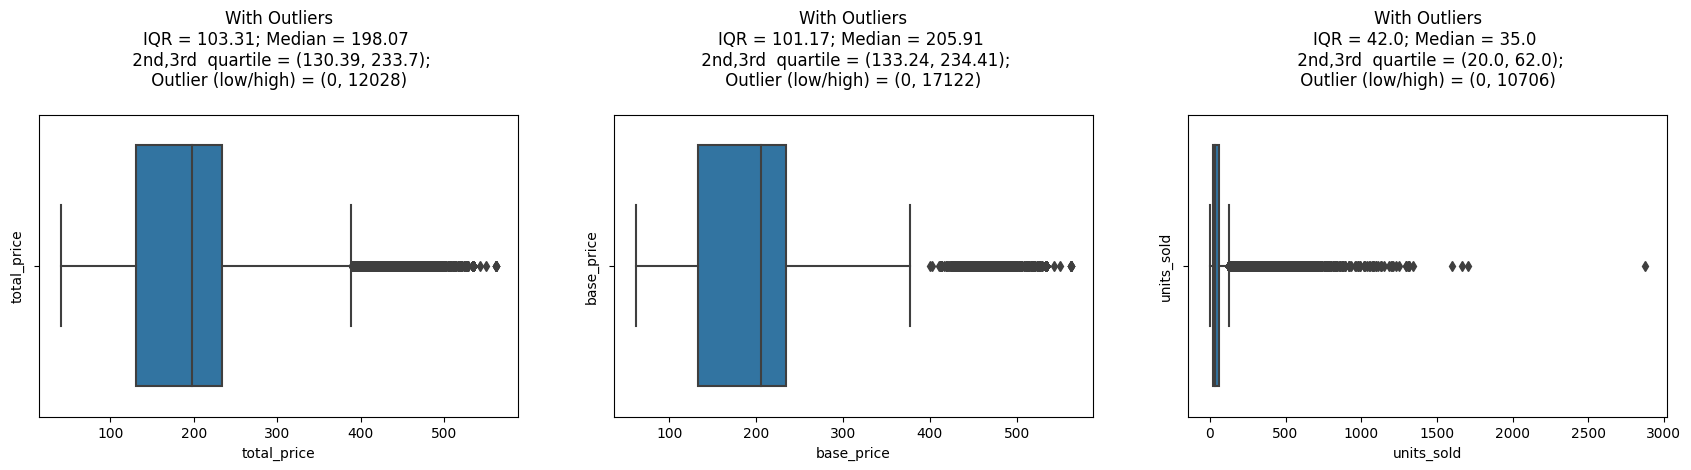

In [32]:
UVA_outlier(train, group1)

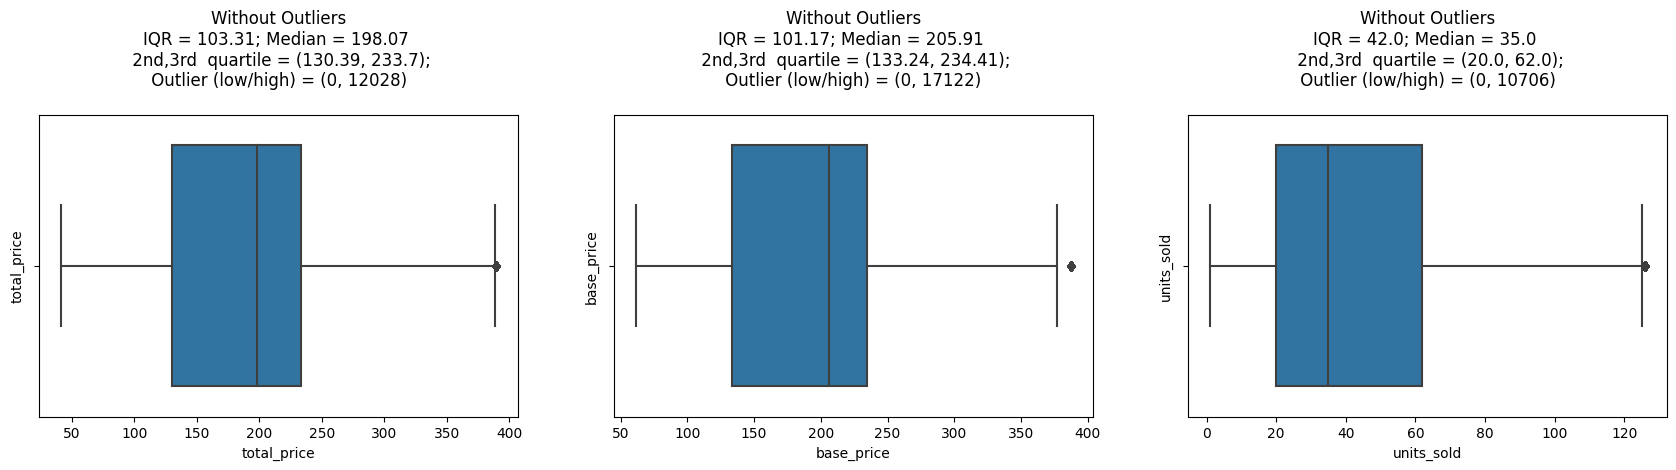

In [33]:
UVA_outlier(train, group1, include_outlier=False)


## Bivariate Analysis : Numerical-Numerical

In [34]:
numerical = train.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

total_price    float64
base_price     float64
units_sold       int64
dtype: object

In [35]:
correlation = numerical.dropna().corr()
correlation

,total_price,base_price,units_sold
total_price,1.000000,0.958885,-0.235625
base_price,0.958885,1.000000,-0.140022
units_sold,-0.235625,-0.140022,1.000000


### Heatmap

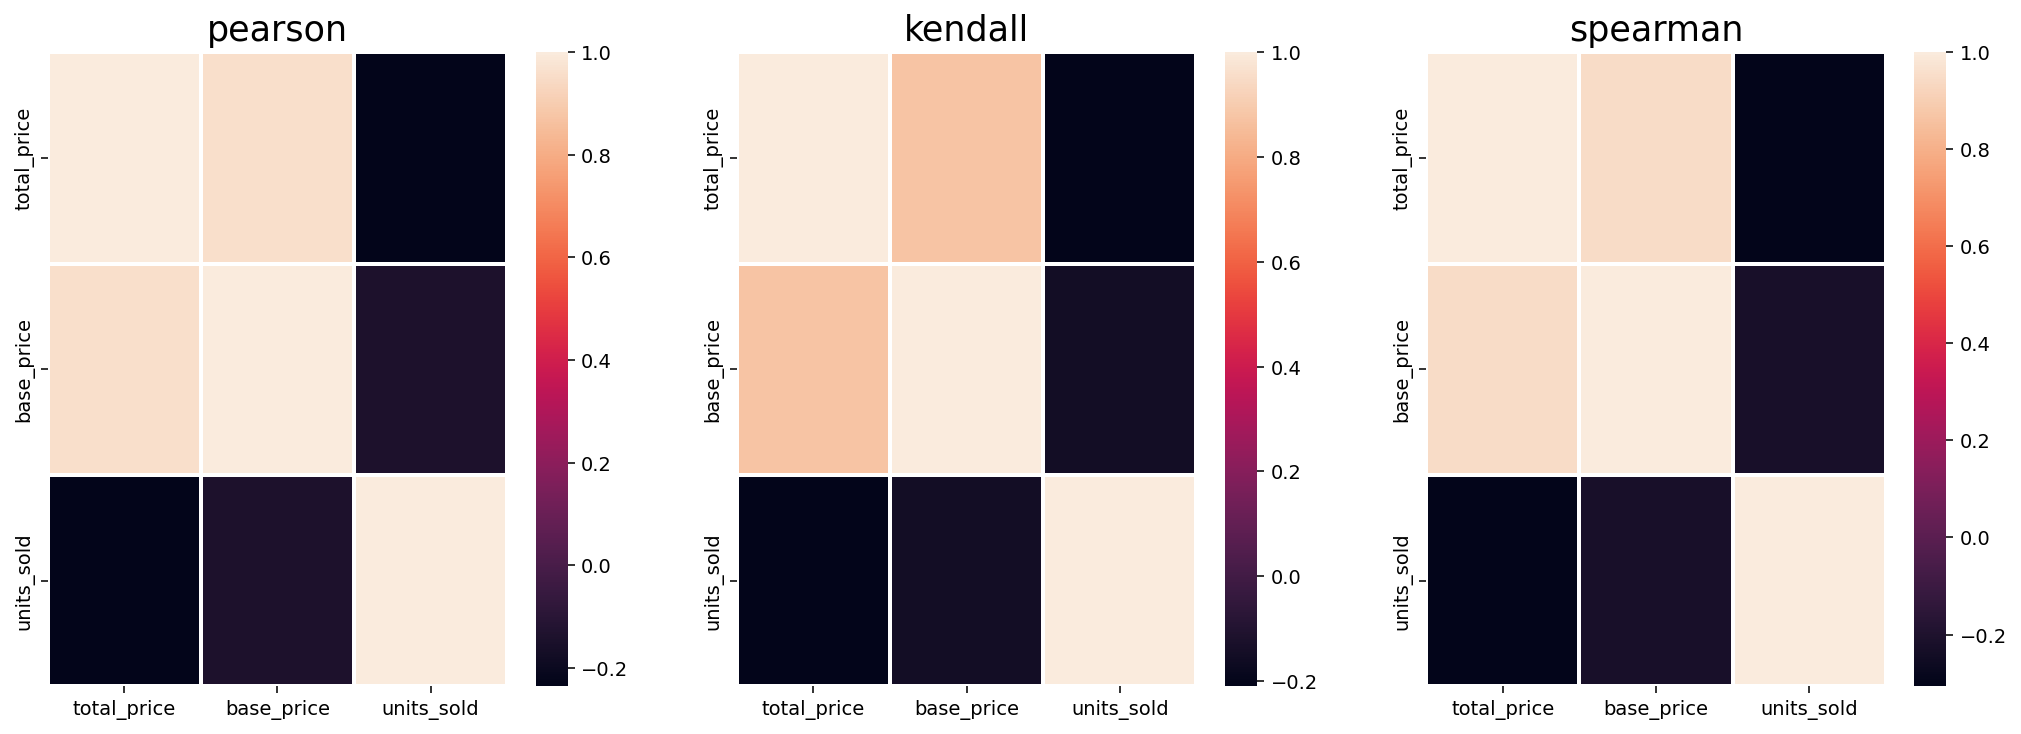

In [36]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(18,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)


### Pairplot

<Figure size 840x560 with 0 Axes>

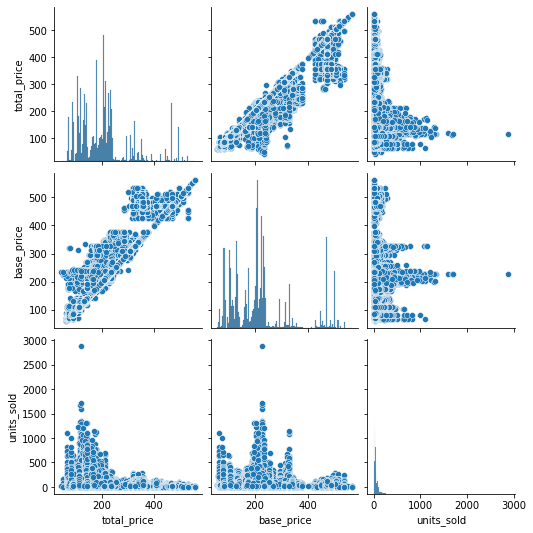

In [37]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical)

In [38]:
train.loc[:,train.select_dtypes(include=['object','category']).columns.tolist()].columns

Index(['store_id', 'sku_id', 'is_featured_sku', 'is_display_sku', 'w_o_y',
       'd_o_w', 'y', 'm_o_y'],
      dtype='object')

<AxesSubplot:xlabel='total_price', ylabel='units_sold'>

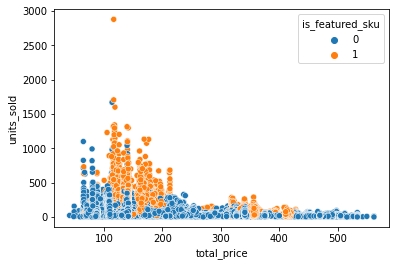

In [39]:
sns.scatterplot(data=train, x="total_price", y="units_sold", hue="is_featured_sku")

<AxesSubplot:xlabel='total_price', ylabel='units_sold'>

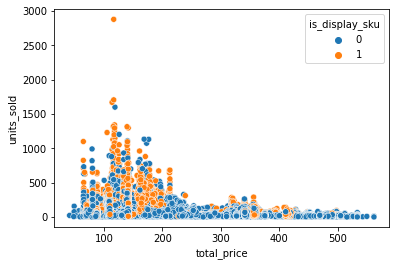

In [40]:
sns.scatterplot(data=train, x="total_price", y="units_sold", hue="is_display_sku")

<AxesSubplot:xlabel='total_price', ylabel='units_sold'>

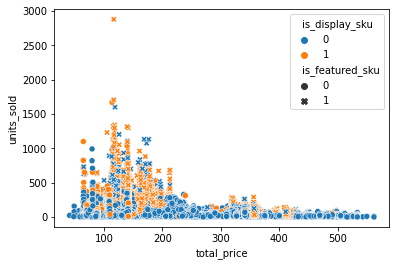

In [41]:
sns.scatterplot(data=train, x="total_price", y="units_sold", hue="is_display_sku", style="is_featured_sku")

<AxesSubplot:xlabel='total_price', ylabel='units_sold'>

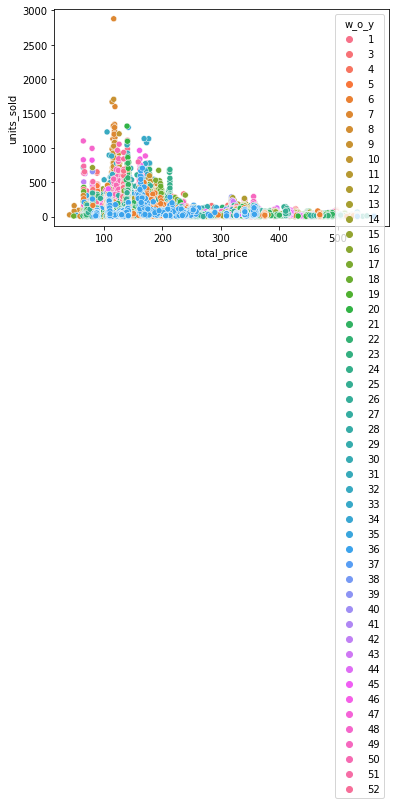

In [42]:
sns.scatterplot(data=train, x="total_price", y="units_sold", hue="w_o_y")

<AxesSubplot:xlabel='total_price', ylabel='units_sold'>

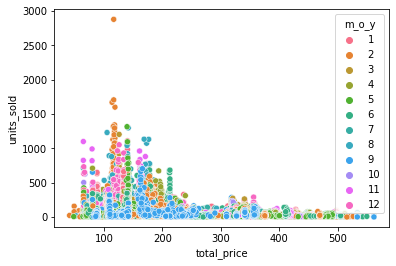

In [43]:
sns.scatterplot(data=train, x="total_price", y="units_sold", hue="m_o_y")

<AxesSubplot:xlabel='total_price', ylabel='units_sold'>

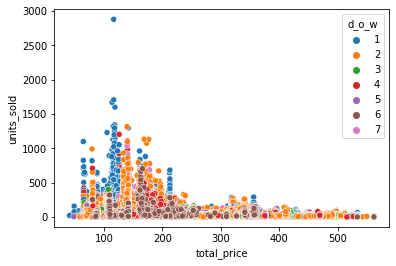

In [44]:
sns.scatterplot(data=train, x="total_price", y="units_sold", hue="d_o_w")

<AxesSubplot:xlabel='total_price', ylabel='units_sold'>

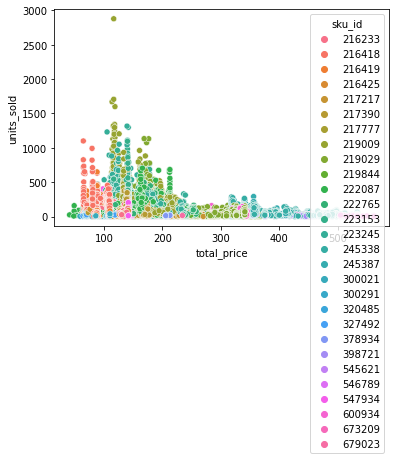

In [45]:
sns.scatterplot(data=train, x="total_price", y="units_sold", hue="sku_id")

<AxesSubplot:xlabel='total_price', ylabel='units_sold'>

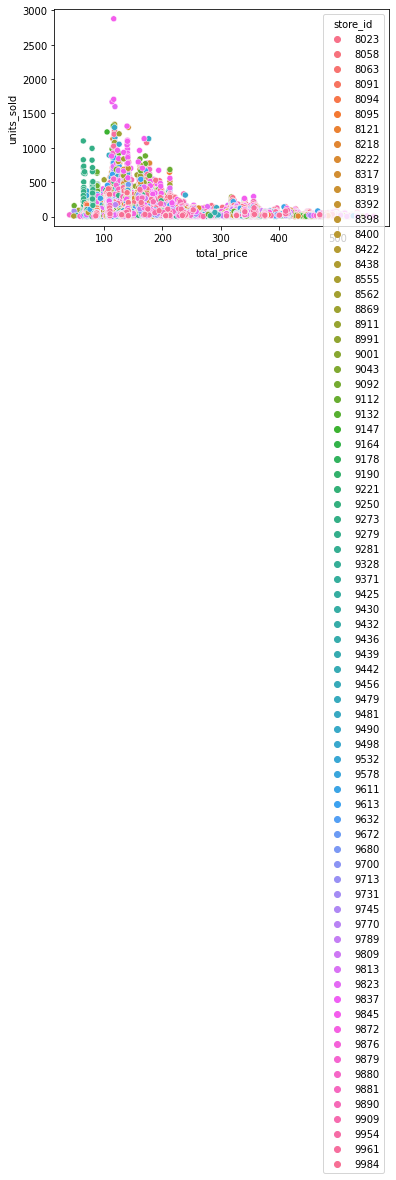

In [46]:
sns.scatterplot(data=train, x="total_price", y="units_sold", hue="store_id")

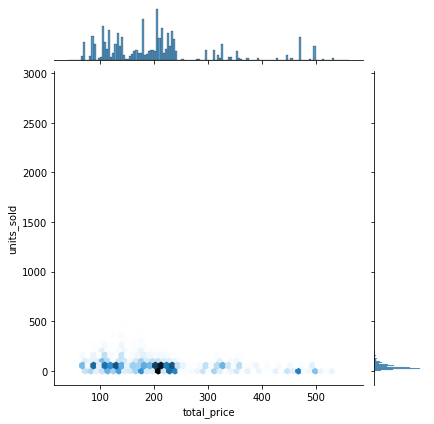

In [47]:
sns.jointplot(x='total_price',y='units_sold',data=train,kind='hex')

## Bivariate : Numerical-Categorical¶

In [48]:
numerical.describe()

,total_price,base_price,units_sold
count,150149.000000,150149.000000,150149.000000
mean,206.626751,219.424262,51.674543
std,103.308516,110.960204,60.207962
min,41.325000,61.275000,1.000000
25%,130.387500,133.237500,20.000000
50%,198.075000,205.912500,35.000000
75%,233.700000,234.412500,62.000000
max,562.162500,562.162500,2876.000000


### Bining numerical data in order to analyze with categorical data

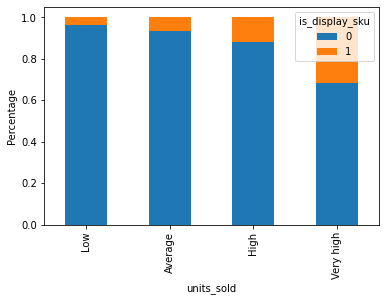

In [49]:
bins = [0,20,35,62,2900 ]
group=['Low','Average','High', 'Very high'] 
train['units_bin']=pd.cut(train['units_sold'],bins,labels=group)
units_bin=pd.crosstab(train['units_bin'],train['is_display_sku'])
units_bin.div(units_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('units_sold') 
P = plt.ylabel('Percentage')

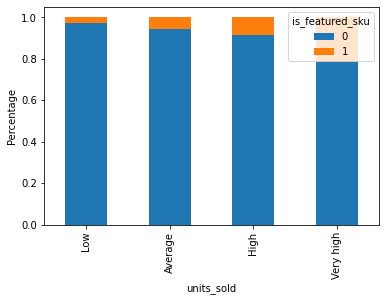

In [50]:
bins = [0,20,35,62,2900 ]
group=['Low','Average','High', 'Very high'] 
train['units_bin']=pd.cut(train['units_sold'],bins,labels=group)
units_bin=pd.crosstab(train['units_bin'],train['is_featured_sku'])
units_bin.div(units_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('units_sold') 
P = plt.ylabel('Percentage')

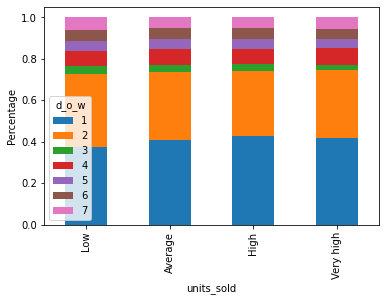

In [51]:
bins = [0,20,35,62,2900 ]
group=['Low','Average','High', 'Very high'] 
train['units_bin']=pd.cut(train['units_sold'],bins,labels=group)
units_bin=pd.crosstab(train['units_bin'],train['d_o_w'])
units_bin.div(units_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('units_sold') 
P = plt.ylabel('Percentage')

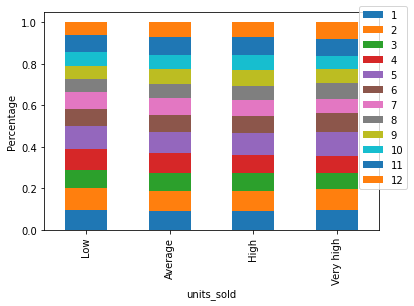

In [52]:
bins = [0,20,35,62,2900 ]
group=['Low','Average','High', 'Very high'] 
train['units_bin']=pd.cut(train['units_sold'],bins,labels=group)
units_bin=pd.crosstab(train['units_bin'],train['m_o_y'])
units_bin.div(units_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('units_sold') 
plt.legend(bbox_to_anchor=(1.1, 1.05))
P = plt.ylabel('Percentage')

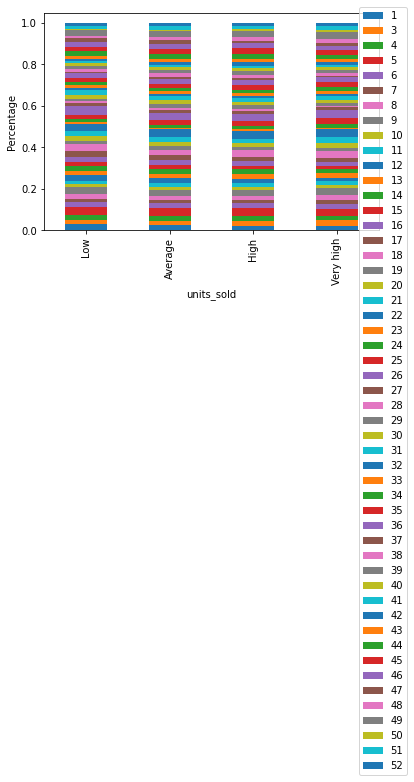

In [53]:
bins = [0,20,35,62,2900 ]
group=['Low','Average','High', 'Very high'] 
train['units_bin']=pd.cut(train['units_sold'],bins,labels=group)
units_bin=pd.crosstab(train['units_bin'],train['w_o_y'])
units_bin.div(units_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('units_sold') 
plt.legend(bbox_to_anchor=(1.1, 1.05))
P = plt.ylabel('Percentage')

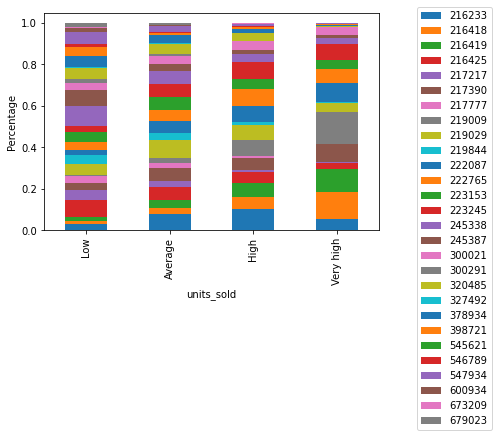

In [54]:
bins = [0,20,35,62,2900 ]
group=['Low','Average','High', 'Very high'] 
train['units_bin']=pd.cut(train['units_sold'],bins,labels=group)
units_bin=pd.crosstab(train['units_bin'],train['sku_id'])
units_bin.div(units_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('units_sold') 
plt.legend(bbox_to_anchor=(1.1, 1.05))
P = plt.ylabel('Percentage')

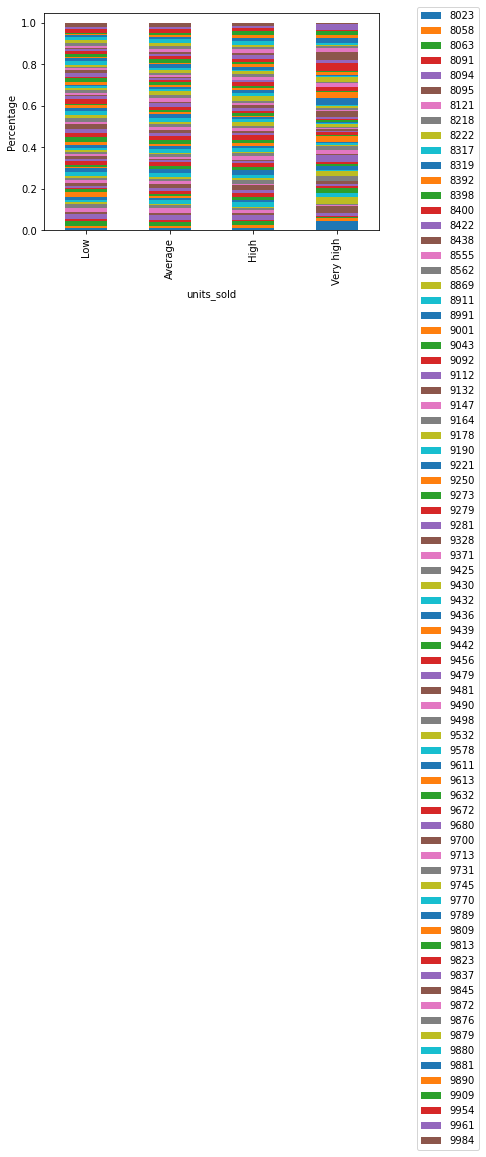

In [55]:
bins = [0,20,35,62,2900 ]
group=['Low','Average','High', 'Very high'] 
train['units_bin']=pd.cut(train['units_sold'],bins,labels=group)
units_bin=pd.crosstab(train['units_bin'],train['store_id'])
units_bin.div(units_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('units_sold') 
plt.legend(bbox_to_anchor=(1.1, 1.05))
P = plt.ylabel('Percentage')

## Outlier Analysis

<Figure size 432x288 with 0 Axes>

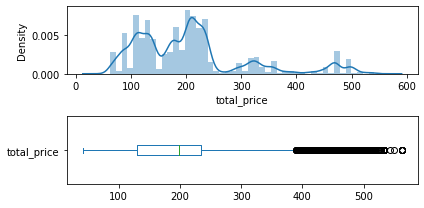

<Figure size 432x288 with 0 Axes>

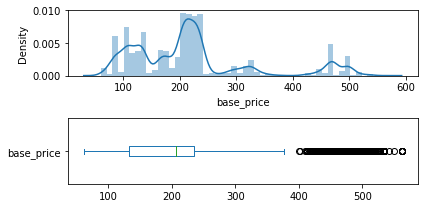

<Figure size 432x288 with 0 Axes>

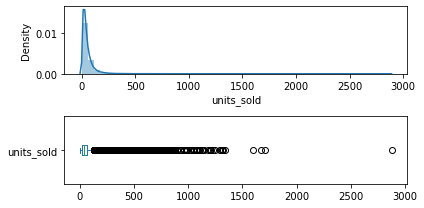

In [56]:
for col in train.loc[:,train.select_dtypes(exclude=['object','category']).columns.tolist()].columns:
    plt.figure() 

    f = plt.figure()
    f.set_figwidth(6)
    f.set_figheight(3)

    plt.subplot(211) 
    sns.distplot(train[col]); 
    plt.subplot(212) 
    train[col].plot.box(vert=False) 
    plt.tight_layout()
    plt.show()

## Analysing and fixing non gaussian data

In [57]:
import scipy.stats as stat
import pylab 

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

-0.09769226389928554


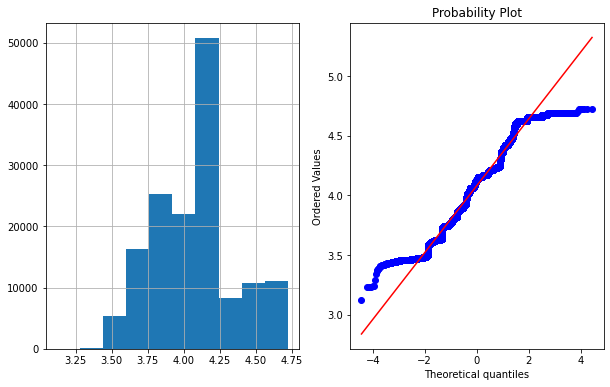

-0.10186842408757255


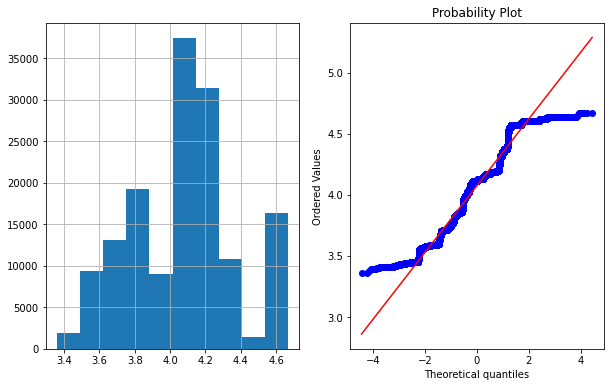

0.04756960699298219


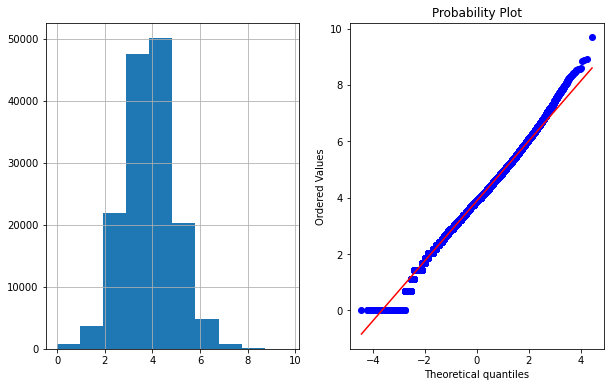

In [58]:
for col in numerical:
    train[col],parameters=stat.boxcox(train[col])
    print(parameters)
    plot_data(train,col)

<Figure size 432x288 with 0 Axes>

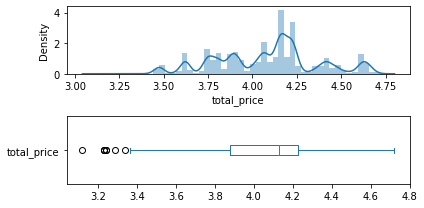

<Figure size 432x288 with 0 Axes>

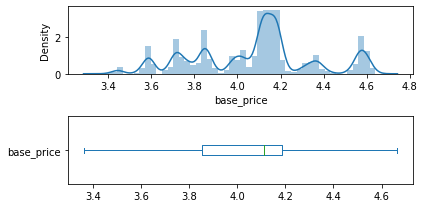

<Figure size 432x288 with 0 Axes>

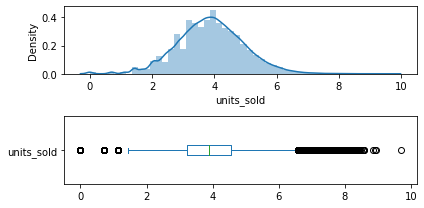

In [59]:
for col in train.loc[:,train.select_dtypes(exclude=['object','category']).columns.tolist()].columns:
    plt.figure() 

    f = plt.figure()
    f.set_figwidth(6)
    f.set_figheight(3)

    plt.subplot(211) 
    sns.distplot(train[col]); 
    plt.subplot(212) 
    train[col].plot.box(vert=False) 
    plt.tight_layout()
    plt.show()

In [60]:
bins = [3,3.9,4.15,4.25,4.8]
group=['Low','Average','High','Very high'] 
train['price_bin']=pd.cut(train['total_price'],bins,labels=group)

# Model Building

## Base case conditions

### Simple Mean ( mean of units_sold)

In [61]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(train, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
trainer = data.iloc[:3*div + 1]
tester = data.iloc[3*div + 1:]

In [62]:
tester['simple_mean'] = trainer['units_sold'].mean()

In [63]:
trainer['units_sold'].mean()

3.8846081849777105

In [64]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_log_error as MSLE
simple_mean_error = np.sqrt(MSLE(tester['units_sold'], tester['simple_mean']))*100
simple_mean_error

24.27266414112963

In [65]:
# initializing new column to zero
tester['is_featured_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in trainer['is_featured_sku'].unique():
  # Assign the mean value corresponding to unique entry
  tester['is_featured_mean'][tester['is_featured_sku'] == i] = trainer['units_sold'][trainer['is_featured_sku'] == i].mean()

In [66]:
is_featured_error = np.sqrt(MSLE(tester['units_sold'], tester['is_featured_mean']))*100
is_featured_error

23.515897849385105

In [67]:
# initializing new column to zero
tester['is_display_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in trainer['is_display_sku'].unique():
  # Assign the mean value corresponding to unique entry
  tester['is_display_mean'][tester['is_display_sku'] == i] = trainer['units_sold'][trainer['is_display_sku'] == i].mean()

In [68]:
is_display_error = np.sqrt(MSLE(tester['units_sold'], tester['is_display_mean']))*100
is_display_error

23.150838942028805

In [69]:
# initializing new column to zero
tester['d_o_w_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in trainer['d_o_w'].unique():
  # Assign the mean value corresponding to unique entry
  tester['d_o_w_mean'][tester['d_o_w'] == i] = trainer['units_sold'][trainer['d_o_w'] == i].mean()

In [70]:
d_o_w_error = np.sqrt(MSLE(tester['units_sold'], tester['d_o_w_mean']))*100
d_o_w_error

24.24859469326897

In [71]:
# initializing new column to zero
tester['w_o_y_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in trainer['w_o_y'].unique():
  # Assign the mean value corresponding to unique entry
  tester['w_o_y_mean'][tester['w_o_y'] == i] = trainer['units_sold'][trainer['w_o_y'] == i].mean()
w_o_y_error = np.sqrt(MSLE(tester['units_sold'], tester['w_o_y_mean']))*100
w_o_y_error

24.197621715207

In [72]:
# initializing new column to zero
tester['m_o_y_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in trainer['m_o_y'].unique():
  # Assign the mean value corresponding to unique entry
  tester['m_o_y_mean'][tester['m_o_y'] == i] = trainer['units_sold'][trainer['m_o_y'] == i].mean()
m_o_y_error = np.sqrt(MSLE(tester['units_sold'], tester['m_o_y_mean']))*100
m_o_y_error

24.25086261102935

In [73]:
# initializing new column to zero
tester['sku_id_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in trainer['sku_id'].unique():
  # Assign the mean value corresponding to unique entry
  tester['sku_id_mean'][tester['sku_id'] == i] = trainer['units_sold'][trainer['sku_id'] == i].mean()
sku_id_error = np.sqrt(MSLE(tester['units_sold'], tester['sku_id_mean']))*100
sku_id_error

21.073712455951842

In [74]:
# initializing new column to zero
tester['store_id_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in trainer['store_id'].unique():
  # Assign the mean value corresponding to unique entry
  tester['store_id_mean'][tester['store_id'] == i] = trainer['units_sold'][trainer['store_id'] == i].mean()
store_id_error = np.sqrt(MSLE(tester['units_sold'], tester['store_id_mean']))*100
store_id_error

22.803936715200365

In [75]:
# initializing new column to zero
tester['price_bin_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in trainer['price_bin'].unique():
  # Assign the mean value corresponding to unique entry
  tester['price_bin_mean'][tester['price_bin'] == str(i)] = trainer['units_sold'][trainer['price_bin'] == str(i)].mean()
price_bin_error = np.sqrt(MSLE(tester['units_sold'], tester['price_bin_mean']))*100
price_bin_error

23.120321489174426

In [76]:
# Initiating new empty column
tester['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'sku_id'
s1 = 'store_id'

# For every Unique Value in s1
for i in tester[s1].unique():
  # For every Unique Value in s2
  for j in tester[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    tester['Super_mean'][(tester[s1] == i) & (tester[s2]==j)] = trainer['units_sold'][(trainer[s1] == i) & (trainer[s2]==j)].mean()

In [77]:
super_mean_error = np.sqrt(MSLE(tester['units_sold'], tester['Super_mean']))*100
super_mean_error

16.42118529928169

In [78]:
train = train.drop(['price_bin','units_bin'],axis=1)

## Categorical to dummies

In [79]:
train = pd.get_dummies(train)

In [80]:
train

,total_price,base_price,units_sold,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,store_id_9043,store_id_9092,store_id_9112,store_id_9132,store_id_9147,store_id_9164,store_id_9178,store_id_9190,store_id_9221,store_id_9250,store_id_9273,store_id_9279,store_id_9281,store_id_9328,store_id_9371,store_id_9425,store_id_9430,store_id_9432,store_id_9436,store_id_9439,store_id_9442,store_id_9456,store_id_9479,store_id_9481,store_id_9490,...,w_o_y_25,w_o_y_26,w_o_y_27,w_o_y_28,w_o_y_29,w_o_y_30,w_o_y_31,w_o_y_32,w_o_y_33,w_o_y_34,w_o_y_35,w_o_y_36,w_o_y_37,w_o_y_38,w_o_y_39,w_o_y_40,w_o_y_41,w_o_y_42,w_o_y_43,w_o_y_44,w_o_y_45,w_o_y_46,w_o_y_47,w_o_y_48,w_o_y_49,w_o_y_50,w_o_y_51,w_o_y_52,d_o_w_1,d_o_w_2,d_o_w_3,d_o_w_4,d_o_w_5,d_o_w_6,d_o_w_7,y_2011,y_2012,y_2013,m_o_y_1,m_o_y_2,m_o_y_3,m_o_y_4,m_o_y_5,m_o_y_6,m_o_y_7,m_o_y_8,m_o_y_9,m_o_y_10,m_o_y_11,m_o_y_12
0,3.702428,3.745530,3.219698,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3.702428,3.669751,3.610826,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3.892359,3.855955,3.160621,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3.892359,3.855955,4.146182,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3.924397,3.887341,4.346981,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,4.233425,4.189725,3.971274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
150146,4.233425,4.189725,3.691803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
150147,4.472759,4.586859,3.730381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
150148,3.927502,4.069575,2.637734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


## Implementing Linear Regression

In [81]:
X = train.drop(['units_sold','base_price'], axis=1)
y = train['units_sold']
X.shape, y.shape

((150149, 182), (150149,))

In [82]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y, random_state = 56)

In [83]:
from sklearn.linear_model import LinearRegression as LR

In [84]:
# Creating instance of Linear Regresssion
lr = LR()

In [85]:
# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [86]:
train_predict = lr.predict(train_x)
k = np.sqrt(MSLE(train_predict, train_y))*100
print('Training Root Mean Square log error', k )

Training Root Mean Square log error 16.256221287055155


In [87]:
test_predict = lr.predict(test_x)
k = np.sqrt(MSLE(test_predict, test_y))*100
print('Test Root Mean Square log error ', k )

Test Root Mean Square log error  16.280168348993087


In [88]:
lr.coef_

array([-2.26219398e+00,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  8.79265583e+09,  8.79265583e+09,  8.79265583e+09,
        8.79265583e+09,  

Text(0.5, 1.0, 'Coefficient plot')

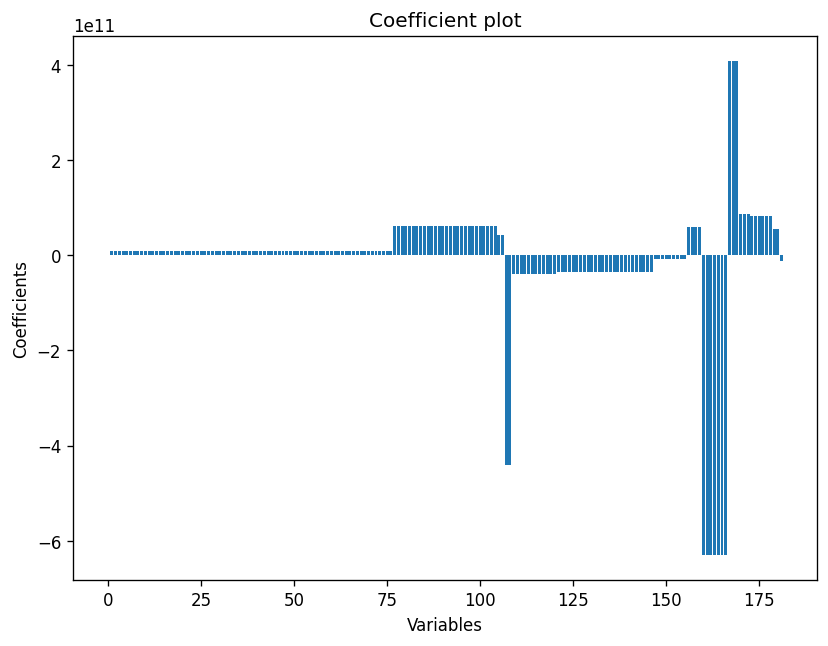

In [89]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

## Checking assumptions of Linear Model

In [90]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'actual values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['actual values'] - residuals['predicted values']
residuals.head()

,actual values,predicted values,residuals
15654,4.299694,4.209290,0.090404
70360,4.540353,4.774597,-0.234244
138565,3.276026,3.221008,0.055018
62696,2.038817,2.247498,-0.208680
44920,4.275371,4.648560,-0.373189


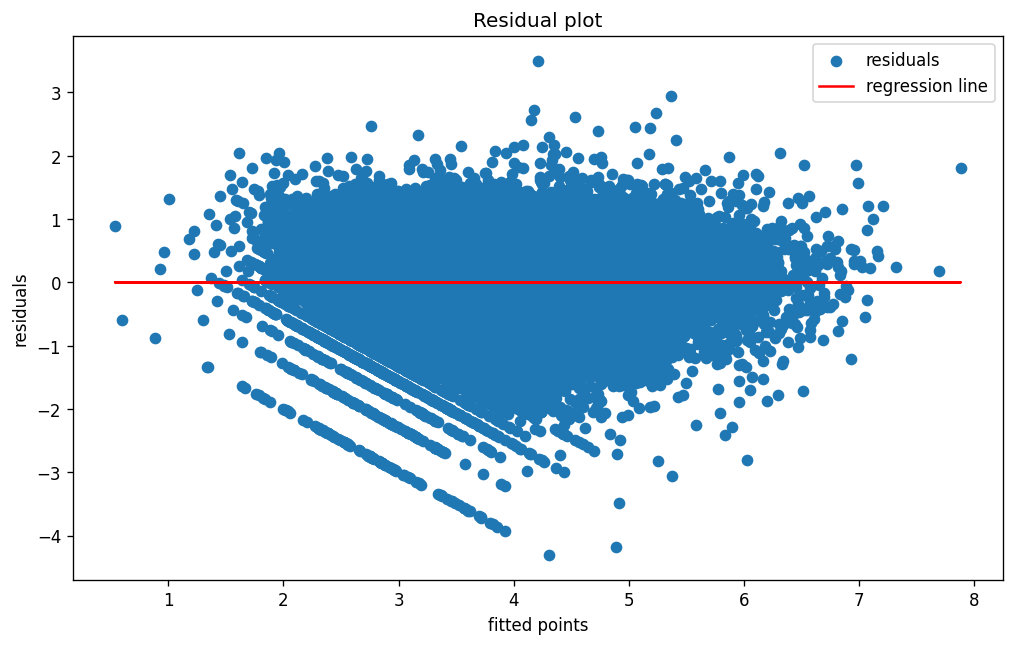

In [91]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = residuals['predicted values']
k = [0 for i in range(0,test_x.shape[0])]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('Residual plot')
#plt.ylim(-4000, 4000)
plt.legend()

In [92]:
test_x.shape, residuals.residuals.shape

((37538, 182), (37538,))

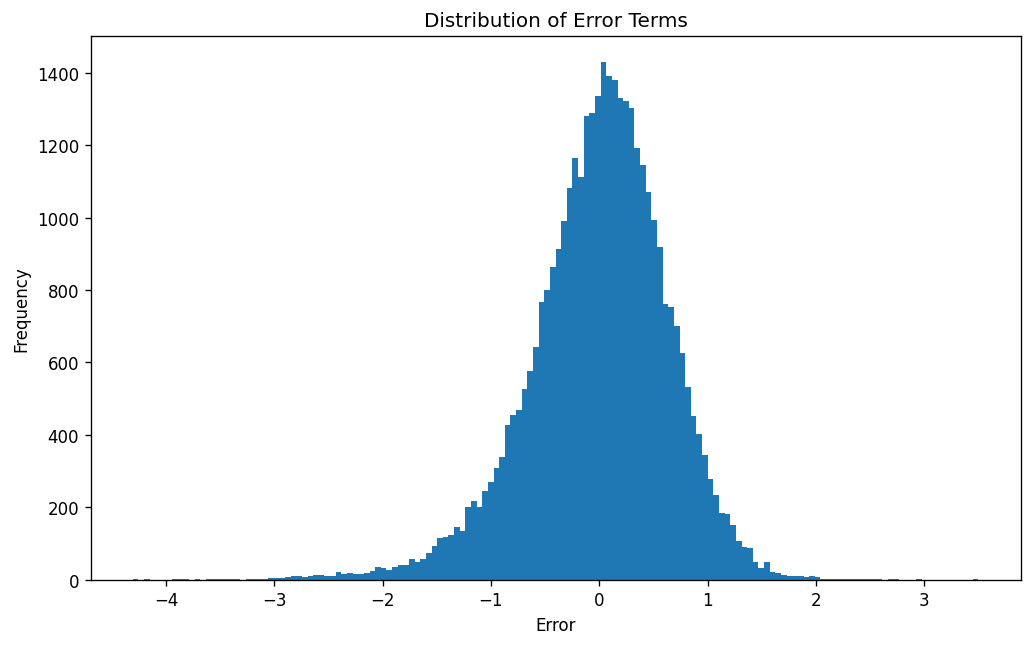

In [93]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

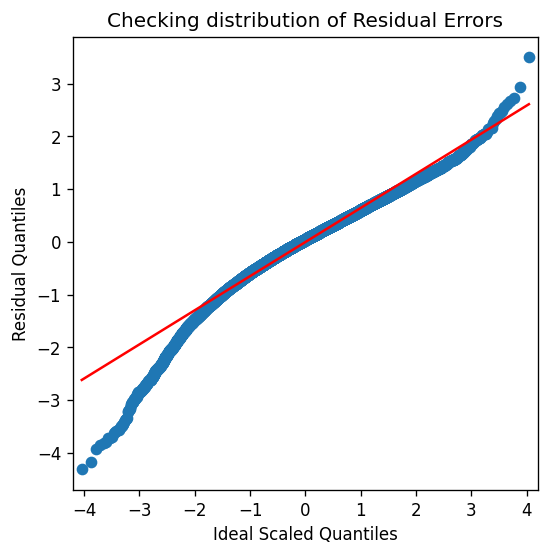

In [94]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [95]:
# Left skewed

In [96]:
numerical = train[['total_price','base_price','units_sold',]]

In [97]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(numerical.values, i) for i in range(numerical.shape[1])], index =numerical.columns)
VIF

total_price    3253.004435
base_price     3378.083629
units_sold       13.257145
dtype: float64

In [98]:
train

,total_price,base_price,units_sold,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,store_id_9043,store_id_9092,store_id_9112,store_id_9132,store_id_9147,store_id_9164,store_id_9178,store_id_9190,store_id_9221,store_id_9250,store_id_9273,store_id_9279,store_id_9281,store_id_9328,store_id_9371,store_id_9425,store_id_9430,store_id_9432,store_id_9436,store_id_9439,store_id_9442,store_id_9456,store_id_9479,store_id_9481,store_id_9490,...,w_o_y_25,w_o_y_26,w_o_y_27,w_o_y_28,w_o_y_29,w_o_y_30,w_o_y_31,w_o_y_32,w_o_y_33,w_o_y_34,w_o_y_35,w_o_y_36,w_o_y_37,w_o_y_38,w_o_y_39,w_o_y_40,w_o_y_41,w_o_y_42,w_o_y_43,w_o_y_44,w_o_y_45,w_o_y_46,w_o_y_47,w_o_y_48,w_o_y_49,w_o_y_50,w_o_y_51,w_o_y_52,d_o_w_1,d_o_w_2,d_o_w_3,d_o_w_4,d_o_w_5,d_o_w_6,d_o_w_7,y_2011,y_2012,y_2013,m_o_y_1,m_o_y_2,m_o_y_3,m_o_y_4,m_o_y_5,m_o_y_6,m_o_y_7,m_o_y_8,m_o_y_9,m_o_y_10,m_o_y_11,m_o_y_12
0,3.702428,3.745530,3.219698,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3.702428,3.669751,3.610826,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3.892359,3.855955,3.160621,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3.892359,3.855955,4.146182,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3.924397,3.887341,4.346981,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,4.233425,4.189725,3.971274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
150146,4.233425,4.189725,3.691803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
150147,4.472759,4.586859,3.730381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
150148,3.927502,4.069575,2.637734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [99]:
numerical = train[['total_price','base_price']]

In [100]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(numerical.values, i) for i in range(numerical.shape[1])], index =numerical.columns)
VIF

total_price    2990.610517
base_price     2990.610517
dtype: float64

In [101]:
# We can see that base price and total_price are multi collinear hence we will frop base_price

## Model Interpretability

In [102]:
train_cols = train_x.columns

In [103]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [104]:
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [105]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = np.sqrt(MSLE(train_predict, train_y))*100
print('Training Root Mean Square Log Error', k )

Training Root Mean Square Log Error 16.256208785244155


In [106]:
train_x

array([[0.76059165, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34641616, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.91725965, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.55922536, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39208214, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70119428, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [107]:
train_predict.mean()

3.8837495246877247

In [108]:
test_predict = lr.predict(test_x)
k = np.sqrt(MSLE(test_predict, test_y))*100
print('Test Root Mean Square Log Error   ', k )

Test Root Mean Square Log Error    16.280134284113064


Text(0.5, 1.0, 'Normalized Coefficient plot')

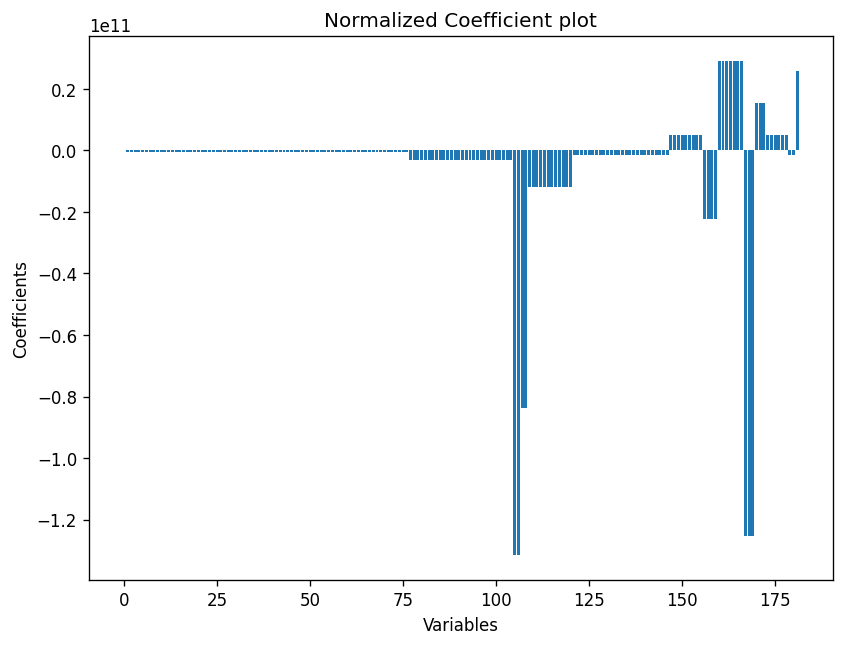

In [109]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_cols))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

## Predicting sales for test data set

In [110]:
test = pd.read_csv('test_nfaJ3J5.csv')

In [111]:
test

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0
...,...,...,...,...,...,...,...,...
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0


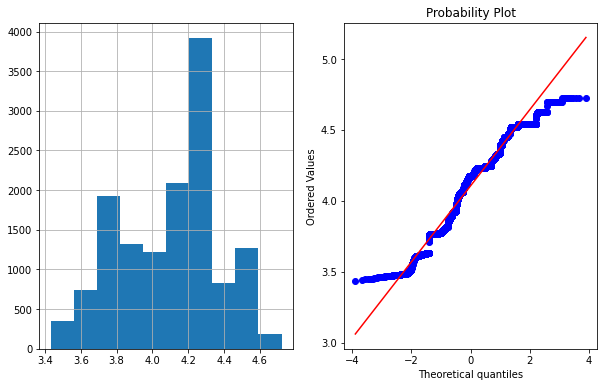

In [112]:
from scipy import stats
test.total_price = stats.boxcox(test.total_price,-0.09769226389928554 )
plot_data(test,'total_price')

In [113]:
test

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,3.759248,108.3000,0,0
1,212646,16/07/13,8091,216419,3.763396,109.0125,0,0
2,212647,16/07/13,8091,216425,3.892359,133.9500,0,0
3,212648,16/07/13,8091,216233,3.892359,133.9500,0,0
4,212649,16/07/13,8091,217390,4.061719,176.7000,0,0
...,...,...,...,...,...,...,...,...
13855,232281,01/10/13,9984,223245,4.247413,241.5375,0,0
13856,232282,01/10/13,9984,223153,4.245685,240.8250,0,0
13857,232285,01/10/13,9984,245338,4.510582,401.8500,1,1
13858,232286,01/10/13,9984,547934,4.110555,191.6625,0,0


In [114]:
date = pd.DatetimeIndex(test['week'])
test['w_o_y'] = date.isocalendar().week.to_numpy()
test['d_o_w'] = date.isocalendar().day.to_numpy()
test['y'] = date.isocalendar().year.to_numpy()
test['m_o_y'] = date.month
test = test.drop('week',axis=1)

In [115]:
test['is_featured_sku'] = test['is_featured_sku'].astype('category')
test['is_display_sku'] = test['is_display_sku'].astype('category')
test['y'] = test['y'].astype('category')
test['sku_id'] = test['sku_id'].astype('category')
test['store_id'] = test['store_id'].astype('category')
test['m_o_y'] = test['m_o_y'].astype('category')
test['d_o_w'] = test['d_o_w'].astype('category')
test['w_o_y'] = test['w_o_y'].astype('category')

In [116]:
test = test.drop(['base_price'],axis=1)

In [117]:
test = pd.get_dummies(test)

In [118]:
test = test.drop('record_ID',axis=1)

In [119]:
for col in train:
    if col not in test and col not in['units_sold','base_price'] :
        test[col] = 0

In [120]:
test

,total_price,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,store_id_9043,store_id_9092,store_id_9112,store_id_9132,store_id_9147,store_id_9164,store_id_9178,store_id_9190,store_id_9221,store_id_9250,store_id_9273,store_id_9279,store_id_9281,store_id_9328,store_id_9371,store_id_9425,store_id_9430,store_id_9432,store_id_9436,store_id_9439,store_id_9442,store_id_9456,store_id_9479,store_id_9481,store_id_9490,store_id_9498,store_id_9532,...,w_o_y_1,w_o_y_3,w_o_y_4,w_o_y_5,w_o_y_6,w_o_y_7,w_o_y_8,w_o_y_9,w_o_y_11,w_o_y_12,w_o_y_13,w_o_y_14,w_o_y_15,w_o_y_16,w_o_y_17,w_o_y_18,w_o_y_19,w_o_y_20,w_o_y_21,w_o_y_22,w_o_y_24,w_o_y_25,w_o_y_26,w_o_y_27,w_o_y_28,w_o_y_32,w_o_y_36,w_o_y_37,w_o_y_40,w_o_y_42,w_o_y_43,w_o_y_44,w_o_y_45,w_o_y_46,w_o_y_47,w_o_y_48,w_o_y_49,w_o_y_50,w_o_y_51,w_o_y_52,d_o_w_1,d_o_w_5,d_o_w_7,y_2011,y_2012,m_o_y_2,m_o_y_4,m_o_y_5,m_o_y_11,m_o_y_12
0,3.759248,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.763396,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.892359,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.892359,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.061719,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13855,4.247413,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13856,4.245685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13857,4.510582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13858,4.110555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
for col in test:
    if col not in train:
        print(col)

w_o_y_2


In [122]:
test = test.drop('w_o_y_2',axis=1)

In [123]:
test = test.dropna(axis=0)

In [124]:
Predicted_units_sold = lr.predict(test)

In [125]:
Predicted_units_sold

array([6.57849734e+10, 6.57849734e+10, 6.57849734e+10, ...,
       8.84190841e+10, 8.84190841e+10, 8.84190841e+10])

In [126]:
Predicted_units_sold.mean()

70318969486.779